# Analysis

## Importing libraries

In [221]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from itertools import chain
from collections import Counter


## Loading data

In [197]:
CMU_df = pd.read_pickle('./data/CMU_cleaned.pkl')
TMDB_df = pd.read_csv('./data/TMDBMovies/TMDB_movie_dataset_v11.csv', sep=',', header=0)
combined_df = pd.read_pickle('./data/combined_dataset.pkl')

## World-wide movie distribution

In [198]:
TMDB_countries_df = TMDB_df.dropna(subset=['production_countries'])

countries = TMDB_countries_df["production_countries"].apply(lambda x: x.split(', ')).tolist()
counts = Counter(list(chain(*countries)))
counts_df =  pd.DataFrame({"country": list(counts.keys()), "movie_count": list(counts.values())}).sort_values(by='movie_count', ascending=False).reset_index(drop=True)
counts_df['log_transformed_count'] = np.log1p(counts_df['movie_count'])  # log1p(x) = log(1 + x) to handle zeroes
counts_df.head(10)

,country,movie_count,log_transformed_count
0,United States of America,192245,12.166531
1,France,44663,10.706923
2,Germany,41821,10.641178
3,Japan,41660,10.637321
4,United Kingdom,41023,10.621913
5,Canada,24286,10.097697
6,India,21243,9.963830
7,Italy,18841,9.843844
8,Brazil,17011,9.741674
9,Spain,15172,9.627273


In [199]:
fig = px.choropleth(
    counts_df,
    locations='country',
    locationmode='country names',
    color='log_transformed_count',
    color_continuous_scale='peach',
    title='Frequency of Movies Published by Country',
    labels={'log_transformed_count': 'Log-transform amout'},
    template='plotly_dark'
)

fig.show()


## All-time movie distribution

### With the CMU-TMDB combined dataset

<Axes: xlabel='release_year'>

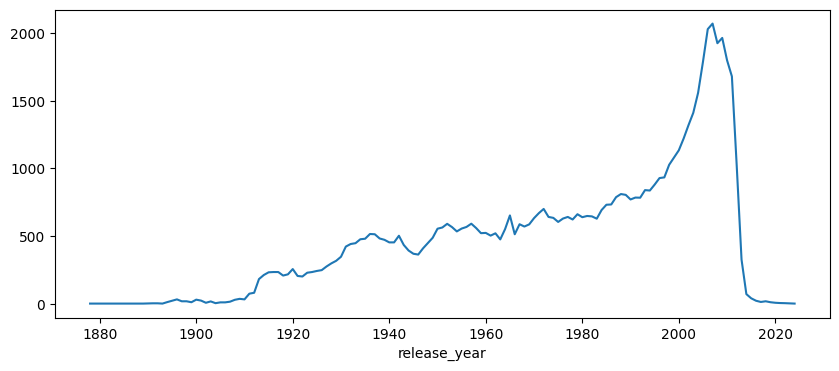

In [200]:
combined_df['release_year'] = pd.to_datetime(combined_df['release_date_final'], format='mixed').dt.year
movies_by_year = combined_df.groupby('release_year')['movie_name'].count()
movies_by_year.plot(kind='line', figsize=(10, 4))

We see a interesting trend with a rapid increase in movie release starting roughly between 1990 and 2000.

### All-time evolution by genre

In [202]:
combined_df['genres_all'] = combined_df['genres'] + combined_df['movie_genres']
combined_df['genres_all'] =combined_df['genres_all'].apply(lambda x: list(set(x)) if x is not np.nan else [])
combined_df.drop(columns=['genres', 'movie_genres'], inplace=True)

In [245]:
all_unique_genres = list(set(chain(*combined_df['genres_all'])))
all_unique_genres.sort()
all_unique_genres

['Absurdism',
 'Acid western',
 'Action',
 'Action Comedy',
 'Action Thrillers',
 'Action/Adventure',
 'Addiction Drama',
 'Adult',
 'Adventure',
 'Adventure Comedy',
 'Airplanes and airports',
 'Albino bias',
 'Alien Film',
 'Alien invasion',
 'Americana',
 'Animal Picture',
 'Animals',
 'Animated Musical',
 'Animated cartoon',
 'Animation',
 'Anime',
 'Anthology',
 'Anthropology',
 'Anti-war',
 'Anti-war film',
 'Apocalyptic and post-apocalyptic fiction',
 'Archaeology',
 'Archives and records',
 'Art film',
 'Auto racing',
 'Avant-garde',
 'B-Western',
 'B-movie',
 'Backstage Musical',
 'Baseball',
 'Beach Film',
 'Beach Party film',
 'Bengali Cinema',
 'Biker Film',
 'Biographical film',
 'Biography',
 'Biopic [feature]',
 'Black comedy',
 'Black-and-white',
 'Blaxploitation',
 'Bloopers & Candid Camera',
 'Bollywood',
 'Boxing',
 'Breakdance',
 'British Empire Film',
 'British New Wave',
 'Bruceploitation',
 'Buddy Picture',
 'Buddy cop',
 'Buddy film',
 'Business',
 'Camp',
 'Cap

In [255]:
combined_by_genre_year = combined_df.groupby('release_year')
aggregate = combined_by_genre_year.agg({'genres_all': lambda x: list(chain(*x))})

genre_selection = [
  	'Drama',
    'Science Fiction', 
    'Horror', 
    'Thriller', 
    'Crime', 
    'Adventure', 
    'Action', 
    'Musical', 
    'Comedy', 
    'Romance',
    'Fantasy',
		'Animation',
		'Western',
		'Apocalyptic and post-apocalyptic fiction',
		'Family',
		'Mystery',
    'History',
    'Documentary',
    'Black-and-white',
    'War',
    ]
for genre in genre_selection:
		aggregate[genre] = aggregate['genres_all'].apply(lambda x: x.count(genre))
aggregate.head(3)

,genres_all,Drama,Science Fiction,Horror,Thriller,Crime,Adventure,Action,Musical,Comedy,Romance,Fantasy,Animation,Western,Apocalyptic and post-apocalyptic fiction,Family,Mystery,History,Documentary,Black-and-white,War
release_year,,,,,,,,,,,,,,,,,,,,,
1878.0,"[Documentary, Silent film, Short Film]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1888.0,"[Silent film, Black-and-white, Documentary, Sh...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1889.0,"[Silent film, Black-and-white, Documentary, Sh...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


<Axes: xlabel='release_year'>

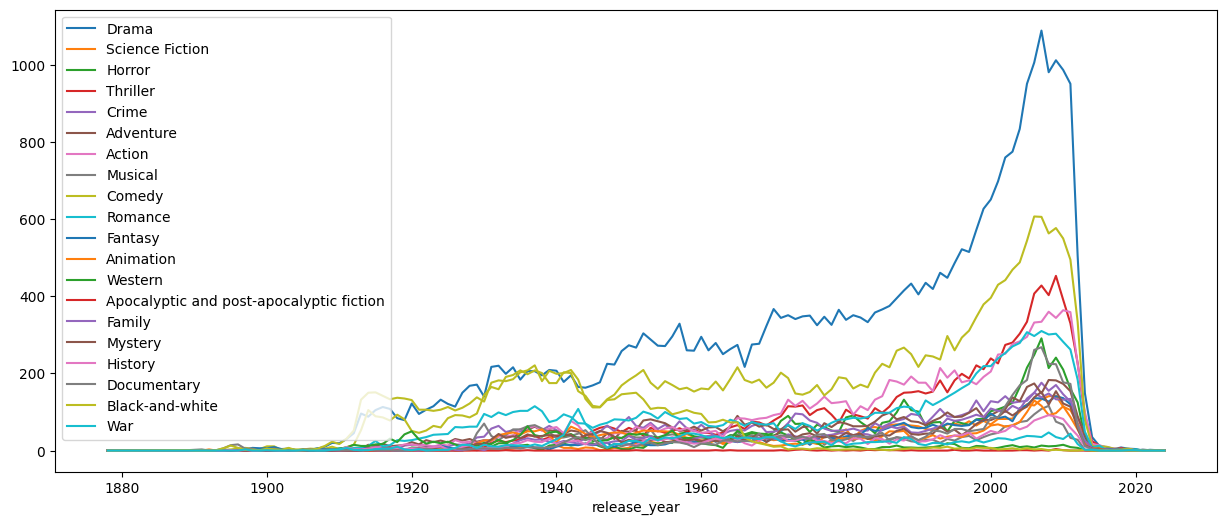

In [256]:
aggregate.plot(y=genre_selection, figsize=(15, 6))

Here we see that the evolution across genres mostly follows the trend we saw earlier when plotting the number of movies released each year. This make sense, but there are some exceptions...

<Axes: xlabel='release_year'>

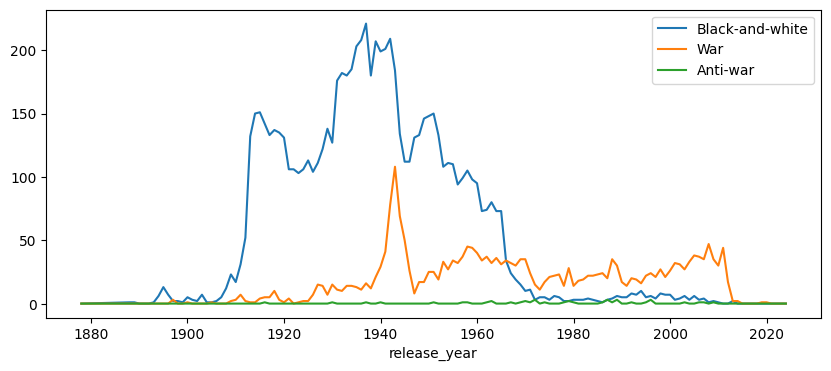

In [ ]:
aggregate.plot(y=['Black-and-white', 'War'], figsize=(10, 4))

In fact, when plotting 'War' movies, we see thatthere is a big peak around the 1939-1945 period corresponding to WWII but there is no obvious increase in 'War' movies thereafter.
When plotting 'Black-and-white' movies, on the other hand, we see that, as technology advanced and color movies became more and more popular, the 'Black-and-white' genre rapidly declined after WWII.

## Exploring genre success over the years

<Axes: xlabel='release_year'>

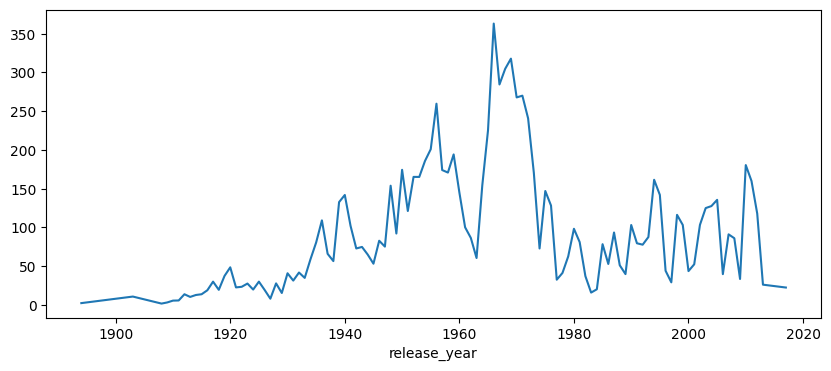

In [258]:
filtered_df = combined_df[combined_df['genres_all'].apply(lambda genres: 'Western' in genres)]
filtered_df.groupby('release_year')['popularity'].sum().plot(kind='line', figsize=(10, 4))